# Point Process Optimization with Periodic Boundary Conditions (Torus Topology)

This notebook implements optimization of point configurations using **periodic boundary conditions** (torus topology). This eliminates the boundary-hugging effect seen in bounded optimization by using the minimum image convention for distance calculations.

In [1]:
# Load Python code
import numpy as np
import matplotlib.pyplot as plt
from point_process_optimizer import PointProcessOptimizer, PointProcessDiagnostics

## 1. Example: 2D Optimisation with Periodic Boundaries

In [2]:
# Define a repulsive kernel (Coulomb-like)
kernel_repulsive = lambda r: 1.0 / (r + 1e-8)

# Create optimizer for 2D with 36 points - WITH PERIODIC BOUNDARIES
opt_2d = PointProcessOptimizer(d=2, n=36, kernel=kernel_repulsive, periodic=True)

# Generate initial random configuration
X_init = opt_2d.generate_random_points()
print(f"Initial potential: {opt_2d.compute_potential(X_init.flatten()):.4f}")

# Optimize
X_opt = opt_2d.optimize(X_init)
print(f"Optimized potential: {opt_2d.compute_potential(X_opt.flatten()):.4f}")

Initial potential: 2084.8952
Optimized potential: 1846.4792


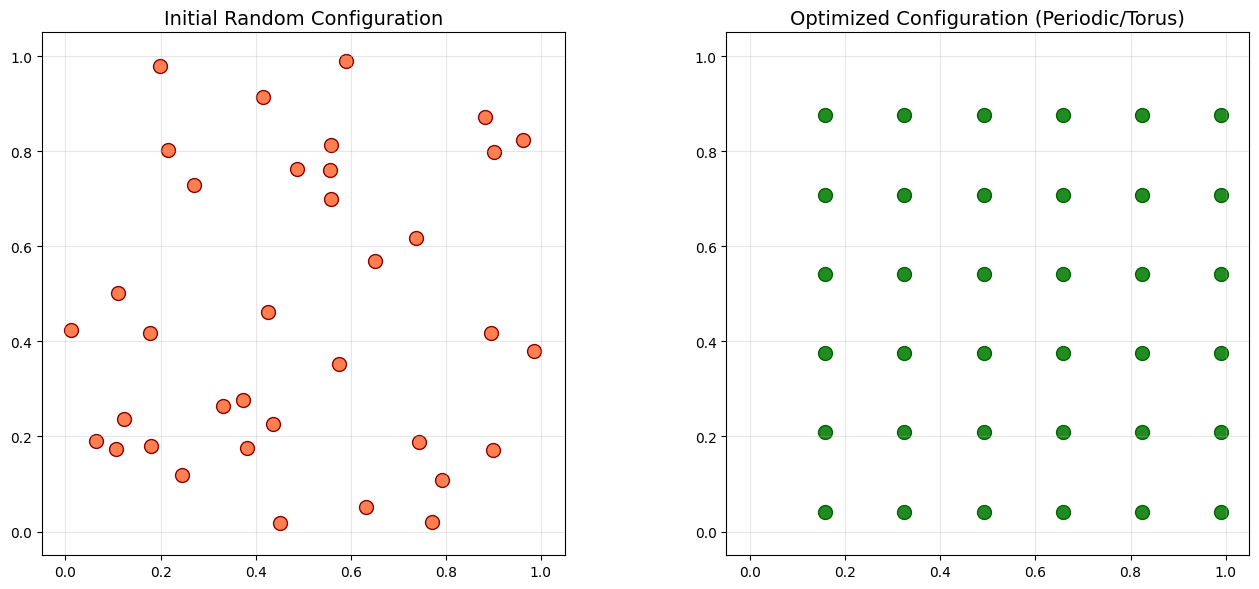

In [3]:
# Plot before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_init[:, 0], X_init[:, 1], s=100, c='coral', edgecolors='darkred')
axes[0].set_title('Initial Random Configuration', fontsize=14)
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_opt[:, 0], X_opt[:, 1], s=100, c='forestgreen', edgecolors='darkgreen')
axes[1].set_title('Optimized Configuration (Periodic/Torus)', fontsize=14)
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Diagnostic plots for the optimized configuration (with periodic diagnostics)
diag = PointProcessDiagnostics(X_opt, periodic=True)
diag.plot_all_diagnostics()

## 2. Comparison: Periodic vs Bounded Optimization

Let's compare the results of periodic (torus) and bounded optimization on the same initial configuration.

In [4]:
np.random.seed(42)  # For reproducibility

# Same initial configuration for both
n_points = 30
X_init_compare = np.random.uniform(size=(n_points, 2))

# Periodic optimization (torus topology)
opt_periodic = PointProcessOptimizer(d=2, n=n_points, periodic=True)
X_periodic = opt_periodic.optimize(X_initial=X_init_compare.copy(), maxiter=1000)

# Bounded optimization (standard)
opt_bounded = PointProcessOptimizer(d=2, n=n_points, periodic=False)
X_bounded = opt_bounded.optimize(X_initial=X_init_compare.copy(), maxiter=1000)

print(f"Periodic final potential: {opt_periodic.optimization_result.fun:.4f}")
print(f"Bounded final potential: {opt_bounded.optimization_result.fun:.4f}")

Periodic final potential: 1260.7480
Bounded final potential: 815.0777


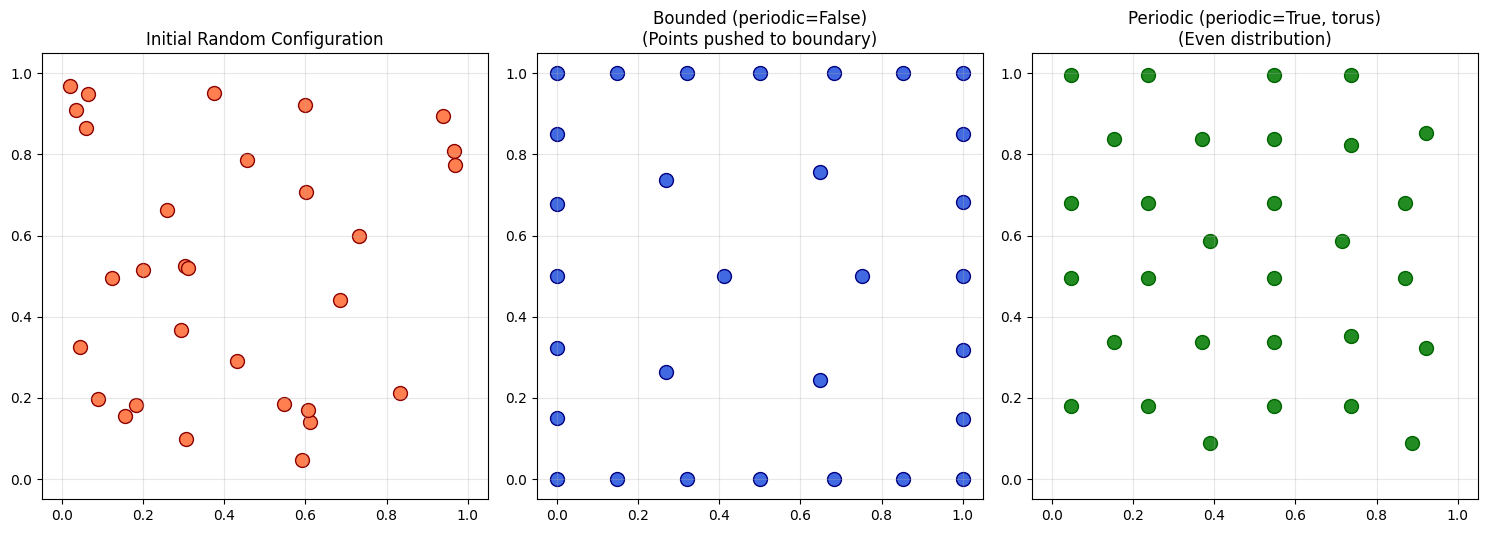


Coordinates near boundary (within 0.05):
  Bounded: 28
  Periodic: 8


In [5]:
# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Initial
axes[0].scatter(X_init_compare[:, 0], X_init_compare[:, 1], s=100, c='coral', edgecolors='darkred')
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)
axes[0].set_title('Initial Random Configuration', fontsize=12)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

# Bounded (non-periodic)
axes[1].scatter(X_bounded[:, 0], X_bounded[:, 1], s=100, c='royalblue', edgecolors='navy')
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)
axes[1].set_title('Bounded (periodic=False)\n(Points pushed to boundary)', fontsize=12)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

# Periodic (torus)
axes[2].scatter(X_periodic[:, 0], X_periodic[:, 1], s=100, c='forestgreen', edgecolors='darkgreen')
axes[2].set_xlim(-0.05, 1.05)
axes[2].set_ylim(-0.05, 1.05)
axes[2].set_title('Periodic (periodic=True, torus)\n(Even distribution)', fontsize=12)
axes[2].set_aspect('equal')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Count points near boundary
threshold = 0.05
near_boundary_bounded = np.sum((X_bounded < threshold) | (X_bounded > 1-threshold))
near_boundary_periodic = np.sum((X_periodic < threshold) | (X_periodic > 1-threshold))
print(f"\nCoordinates near boundary (within {threshold}):")
print(f"  Bounded: {near_boundary_bounded}")
print(f"  Periodic: {near_boundary_periodic}")

## 3. Example: 3D Optimisation with Periodic Boundaries

In [6]:
# Create optimizer for 3D with 50 points - WITH PERIODIC BOUNDARIES
opt_3d = PointProcessOptimizer(d=3, n=50, kernel=kernel_repulsive, periodic=True)

# Generate initial random configuration
X_init_3d = opt_3d.generate_random_points()
print(f"Initial potential: {opt_3d.compute_potential(X_init_3d.flatten()):.4f}")

# Optimize
X_opt_3d = opt_3d.optimize(X_init_3d, maxiter=500)
print(f"Optimized potential: {opt_3d.compute_potential(X_opt_3d.flatten()):.4f}")

Initial potential: 2856.6839
Optimized potential: 2649.3862


In [7]:
# Interactive 3D plot
opt_3d.plot_configuration(X_opt_3d, title='3D Optimized Configuration (Periodic/Torus)')

## 4. Example: 1D Optimisation with Periodic Boundaries

In [8]:
# Create optimizer for 1D with 20 points - WITH PERIODIC BOUNDARIES
opt_1d = PointProcessOptimizer(d=1, n=20, kernel=kernel_repulsive, periodic=True)

# Generate initial random configuration
X_init_1d = opt_1d.generate_random_points()
print(f"Initial potential: {opt_1d.compute_potential(X_init_1d.flatten()):.4f}")

# Optimize
X_opt_1d = opt_1d.optimize(X_init_1d, maxiter=500)
print(f"Optimized potential: {opt_1d.compute_potential(X_opt_1d.flatten()):.4f}")

Initial potential: 2406.4215
Optimized potential: 1151.5872


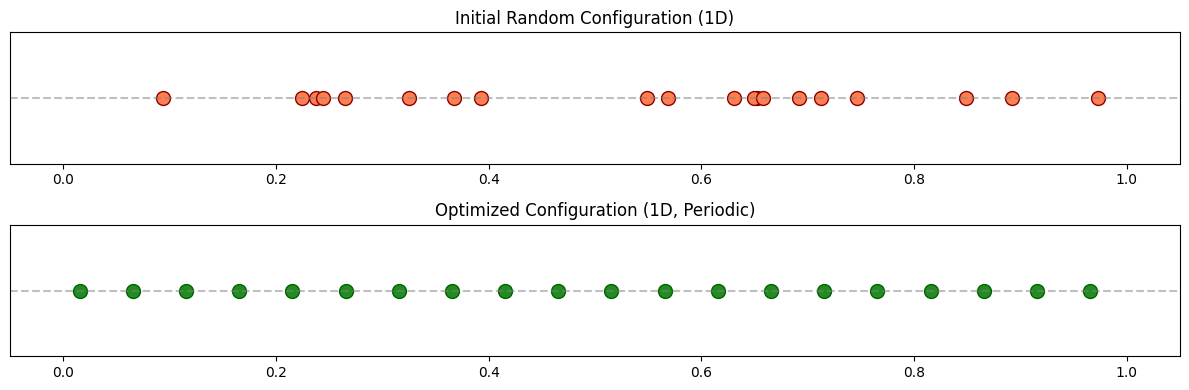


Expected uniform spacing: 0.0500
Mean spacing: 0.0500
Std of spacings: 0.0000


In [9]:
# Plot 1D results
fig, axes = plt.subplots(2, 1, figsize=(12, 4))

axes[0].scatter(X_init_1d[:, 0], np.zeros(20), s=100, c='coral', edgecolors='darkred')
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.5, 0.5)
axes[0].set_title('Initial Random Configuration (1D)', fontsize=12)
axes[0].set_yticks([])
axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)

axes[1].scatter(X_opt_1d[:, 0], np.zeros(20), s=100, c='forestgreen', edgecolors='darkgreen')
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.5, 0.5)
axes[1].set_title('Optimized Configuration (1D, Periodic)', fontsize=12)
axes[1].set_yticks([])
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Check spacing - should be approximately uniform
sorted_x = np.sort(X_opt_1d[:, 0])
spacings = np.diff(sorted_x)
# Also consider wrap-around spacing
wrap_spacing = 1.0 - sorted_x[-1] + sorted_x[0]
all_spacings = np.append(spacings, wrap_spacing)
print(f"\nExpected uniform spacing: {1.0/20:.4f}")
print(f"Mean spacing: {np.mean(all_spacings):.4f}")
print(f"Std of spacings: {np.std(all_spacings):.4f}")